`mlxtend` 是一位教授编写的开源类库.虽然他告诉我们这个类库的编写目的是为了教学,所以并不优先考虑效率.但是这并不妨碍这个类库成为我们的好帮手.尤其其中的集成学习部分,更是我们快速编写程序的利器.其不仅完美的兼容sklearn,而且其他常用功能也有很好的扩展.比如结果可视化的`mlxtend.plotting`,自带数据`mlxtend.data`,亦或是`from sklearn.model_selection.GridSearchCV`的结合都十分出色.


`EnsembleVoteClassifier`是mlxtend的投票分类器,其使用相当方便.投票类型(使用学习器概率投票的软投票器,亦或使用分类结果投票的硬投票器)的选择十分方便,直接使用参数`voting='soft' or 'hard'`进行选择即可.而学习器权重则直接通过参数`weights`设置即可.可是说是十分方便了.

## Example

下面的例子展示了`mlxtend`中投票分类器的使用.并且借助`mlxtend.plotting.plot_decision_regions`函数对学习器和两种投票集成器结果进行了可视化.同时这也是`mlxtend`在[github以及github.io首页给我们展示的示例代码](https://github.com/rasbt/mlxtend)

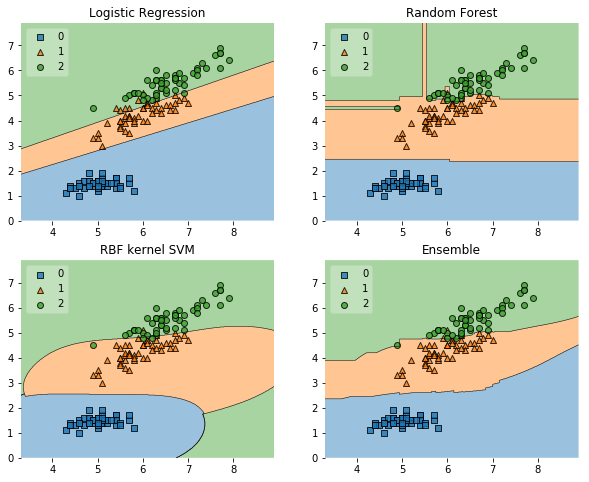

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

import os
import warnings
warnings.filterwarnings("ignore")

# Initializing Classifiers
clf1 = LogisticRegression(random_state=0)
clf2 = RandomForestClassifier(random_state=0)
clf3 = SVC(random_state=0, probability=True)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[2, 1, 1], voting='soft')

# Loading some example data
X, y = iris_data()
X = X[:,[0, 2]]

# Plotting Decision Regions
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         ['Logistic Regression', 'Random Forest', 'RBF kernel SVM', 'Ensemble'],
                         itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
plt.show()

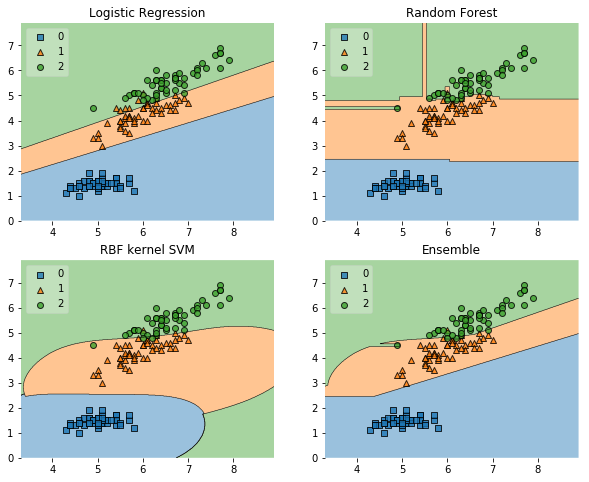

In [3]:
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[2, 1, 1], voting='hard')

# Loading some example data
X, y = iris_data()
X = X[:,[0, 2]]

# Plotting Decision Regions
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         ['Logistic Regression', 'Random Forest', 'RBF kernel SVM', 'Ensemble'],
                         itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
plt.show()